### 정규성(scipy.stats.shapiro), 등분산(scipy.stats.levene) 검정의 결과에 따라 시행하는 검정이 다르다
#### 정규성 만족, 등분산 만족 : one-way anova
#### 정규성 만족, 등분산 불만족 : welch’s anova
#### 정규성 불만족 : kruskal-wallis H test

### Question

#### x1,x2,x3의 변수들의 평균의 차이가 존재하는지 검정하라.
#### 차이가 존재한다면 사후 분석까지 진행하라

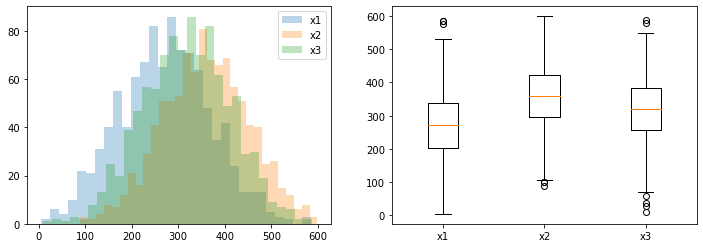

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova.csv')

data = df.x1
data2 = df.x2
data3 = df.x3

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='x1')
ax[0].hist(data2,alpha=0.3,bins=30,label='x2')
ax[0].hist(data3,alpha=0.3,bins=30,label='x3')
ax[0].legend()
labels = ['x1', 'x2', 'x3']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [2]:
# 정규성 검정
from scipy.stats import shapiro

print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

ShapiroResult(statistic=0.9979788064956665, pvalue=0.27388232946395874)
ShapiroResult(statistic=0.9979414939880371, pvalue=0.25899720191955566)
ShapiroResult(statistic=0.9987626671791077, pvalue=0.7304413914680481)


#### 세 집단 모두 p-value 값이 0.05보다 크므로 귀무가설(정규성을 가진다)을 기각할 수 없다.
#### 따라서 세 집단 모두 정규성을 가진다.

In [3]:
from scipy.stats import levene

print(levene(data,data2,data3))

LeveneResult(statistic=2.71270174202054, pvalue=0.06652021922816238)


#### levene 검정 결과 p-value가 0.05보다 크므로 귀무가설 (등분산성을 만족한다)을 기각할 수 없다.
#### 따라서 등분산성을 만족한다.

In [4]:
# anova 방법 1 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

dfm =df.melt()
dfm.head()
model = ols('value ~ C(variable)', dfm).fit()
print(anova_lm(model))

                 df        sum_sq       mean_sq           F        PR(>F)
C(variable)     2.0  3.774347e+06  1.887173e+06  209.884999  4.919153e-86
Residual     2997.0  2.694742e+07  8.991464e+03         NaN           NaN


In [5]:
# anova 방법 2 (scipy.stats.f_oneway)
from scipy.stats import f_oneway 

print(f_oneway(data, data2, data3))

F_onewayResult(statistic=209.88499932318638, pvalue=4.919152988455592e-86)


#### p-value 는 4.9e-86이므로 세 그룹 중 어느 두 그룹은 평균이 동일하다고 볼 수 없다.

In [6]:
#사후검정 방법 1 투키의 HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(dfm.value, dfm.variable, alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
    x1     x2  86.8388 0.001   76.895  96.7826   True
    x1     x3  45.8253 0.001  35.8815  55.7691   True
    x2     x3 -41.0135 0.001 -50.9572 -31.0697   True
-----------------------------------------------------


#### 유의수준 5%기준으로 도표상의 reject을 보면 group간에 모든 귀무가설(두 그룹의 평균은 같다)을 기각 하는 것을 볼수 있다

C:\Users\wnsgo\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


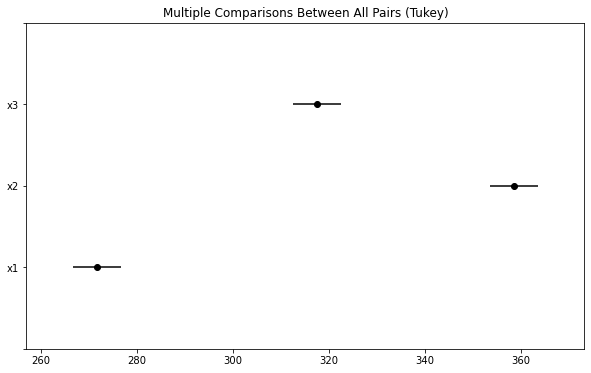

In [7]:
fig = posthoc.plot_simultaneous()
plt.show()

#### 시각화 y축은 각 label이다. 겹치는 구간이 없으므로 차이가 존재함을 알수 있음

In [8]:
# 사후 검정 방법 2 봉페로니 교정
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(dfm.value, dfm.variable)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval pval_corr reject
--------------------------------------------
    x1     x2 -20.2943  0.0       0.0   True
    x1     x3 -10.6639  0.0       0.0   True
    x2     x3    9.897  0.0       0.0   True
--------------------------------------------


### Question

#### x1,x2,x3의 변수들의 평균의 차이가 존재하는지 검정하라

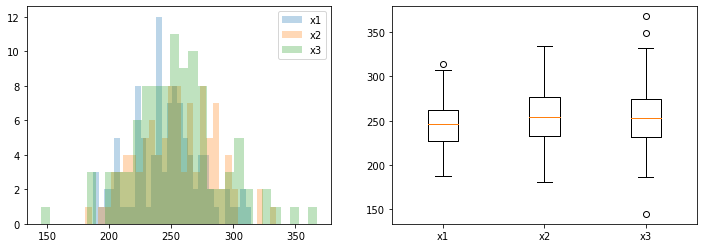

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova2.csv')

data = df.x1
data2 = df.x2
data3 = df.x3

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='x1')
ax[0].hist(data2,alpha=0.3,bins=30,label='x2')
ax[0].hist(data3,alpha=0.3,bins=30,label='x3')
ax[0].legend()
labels = ['x1', 'x2', 'x3']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [10]:
from scipy.stats import shapiro

print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

ShapiroResult(statistic=0.9886646866798401, pvalue=0.5584300756454468)
ShapiroResult(statistic=0.992436408996582, pvalue=0.8518696427345276)
ShapiroResult(statistic=0.9848726987838745, pvalue=0.31093811988830566)


#### 정규성 검정 -> 모두 정규성을 가짐

In [11]:
from scipy.stats import levene

print(levene(data,data2,data3))

LeveneResult(statistic=1.845797549925243, pvalue=0.15970603203148068)


#### 등분산 만족한다

In [12]:
# anova 방법 1 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

dfm =df.melt()
dfm.head()
model = ols('value ~ C(variable)', dfm).fit()
print(anova_lm(model))

                df         sum_sq      mean_sq         F    PR(>F)
C(variable)    2.0    4856.241506  2428.120753  2.386153  0.093744
Residual     297.0  302223.696757  1017.588205       NaN       NaN


In [13]:
# anova 방법 2 (scipy.stats.f_oneway)
from scipy.stats import f_oneway

print(f_oneway(data, data2, data3))

F_onewayResult(statistic=2.386152612702158, pvalue=0.09374426938585284)


#### p-value 는 0.09이므로 귀무가설을 기각할 수 없다. 3그룹은 평균이 동일하다고 볼 수 있다.

### Question

#### target 변수들에 의해 value값들의 평균의 차이가 존재하는지 검정하라

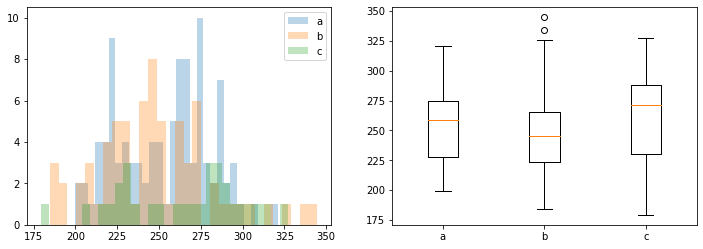

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova8.csv')

data = df[df.target=='a'].value
data2 = df[df.target=='b'].value
data3 = df[df.target=='c'].value

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='a')
ax[0].hist(data2,alpha=0.3,bins=30,label='b')
ax[0].hist(data3,alpha=0.3,bins=30,label='c')
ax[0].legend()
labels = ['a', 'b', 'c']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [15]:
from scipy.stats import shapiro

print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

ShapiroResult(statistic=0.9666388034820557, pvalue=0.01229821890592575)
ShapiroResult(statistic=0.9713969230651855, pvalue=0.1093384176492691)
ShapiroResult(statistic=0.9651245474815369, pvalue=0.4156579077243805)


#### 정규성 검정 -> 하나의 변수가 정규성을 가지지 않는다. -> 비모수 검정인 kruskal 검정을 사용해야한다

In [16]:
from scipy.stats import levene

print(levene(data,data2,data3))

LeveneResult(statistic=1.4817966330841852, pvalue=0.2297504921313145)


#### 등분산 만족한다

In [17]:
# anova
from scipy.stats import f_oneway  ,kruskal
print(f_oneway(data, data2, data3))
print(kruskal(data, data2, data3))



F_onewayResult(statistic=2.7145676300093733, pvalue=0.06871171968864054)
KruskalResult(statistic=6.9277037668798584, pvalue=0.03130893110123)


#### 비교를 위해 f_oneway 와 kruskal 모두 시행했다.
#### kruskal의 경우 평균의 차이가 존재, f_oneway의 경우 차이가 존재하지 않는다

### Question

#### target 변수들에 의해 value값들의 평균의 차이가 존재하는지 검정하라

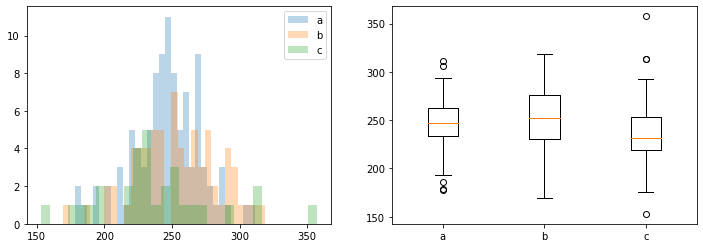

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/anova10.csv')

data = df[df.target=='a'].value
data2 = df[df.target=='b'].value
data3 = df[df.target=='c'].value

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(data,alpha=0.3,bins=30,label='a')
ax[0].hist(data2,alpha=0.3,bins=30,label='b')
ax[0].hist(data3,alpha=0.3,bins=30,label='c')
ax[0].legend()
labels = ['a', 'b', 'c']
lst =[data,data2,data3]
ax[1].boxplot(lst, labels=labels) 
plt.show()

In [19]:
from scipy.stats import shapiro

print(shapiro(data))
print(shapiro(data2))
print(shapiro(data3))

ShapiroResult(statistic=0.9835558533668518, pvalue=0.24877400696277618)
ShapiroResult(statistic=0.9923046231269836, pvalue=0.9479172825813293)
ShapiroResult(statistic=0.952351450920105, pvalue=0.19536875188350677)


#### 정규성 검정 -> 정규성 가짐

In [20]:
from scipy.stats import levene

print(levene(data,data2,data3))

LeveneResult(statistic=4.530341210288782, pvalue=0.011923468290294031)


#### 등분산 만족하지 않음 -> welch test를 진행해야한다 (pingouin.welch_anova)

In [21]:
# anova
from scipy.stats import f_oneway  ,kruskal

print(f_oneway(data, data2, data3))
print(kruskal(data, data2, data3))

F_onewayResult(statistic=3.0058619004231084, pvalue=0.051771776524375666)
KruskalResult(statistic=7.273258848614091, pvalue=0.026340978769385875)


#### 비교를 위해 f_oneway 와 kruskal 모두 시행했다.
#### kruskal의 경우 평균의 차이가 존재, f_oneway, welch(p-unc값)의 경우 차이가 존재하지 않는다